In [1]:
library(tidyverse)
library(repr)
library(tidymodels)
library(rvest)
library(readxl)
library(RColorBrewer)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.9      ✔ rsample   0.0.7 
✔ infer     0.5.4      ✔ tune      0.1.1 
✔ modeldata 0.0.2      ✔ workflows 0.2.0 
✔ parsnip   0.1.3    

In [30]:
training_data <- read_excel("data/User_knowledge.xls", sheet = 2) %>%
            select(STG, LPR, PEG, UNS) %>%
            rename(study_time_goal = STG,
                  exam_performance_related = LPR,
                  exam_performance_goal = PEG,
                  knowledge_level = UNS) %>%
            mutate(knowledge_level = as_factor(knowledge_level)) 
training_data

New names:
* `` -> ...7
* `` -> ...8



study_time_goal,exam_performance_related,exam_performance_goal,knowledge_level
<dbl>,<dbl>,<dbl>,<fct>
0.00,0.00,0.00,very_low
0.08,0.24,0.90,High
0.06,0.25,0.33,Low
0.10,0.65,0.30,Middle
0.08,0.98,0.24,Low
0.09,0.10,0.66,Middle
0.10,0.29,0.56,Middle
0.15,0.40,0.01,very_low
0.20,0.72,0.25,Low


In [31]:
study_data <- training_data %>%
        group_by(knowledge_level) %>%
        summarize(avg_exam_perf_goal = mean(exam_performance_goal),
                  avg_exam_perf_rel = mean(exam_performance_related),
                 avg_study_time = mean(study_time_goal),
                 number_of_observations = n()) %>%
        arrange(desc(avg_exam_perf_goal))
study_data

`summarise()` ungrouping output (override with `.groups` argument)



knowledge_level,avg_exam_perf_goal,avg_exam_perf_rel,avg_study_time,number_of_observations
<fct>,<dbl>,<dbl>,<dbl>,<int>
High,0.77253968,0.5012698,0.4216508,63
Middle,0.54238636,0.3428409,0.3999773,88
Low,0.23762651,0.4973494,0.3211446,83
very_low,0.09083333,0.3587500,0.3057917,24


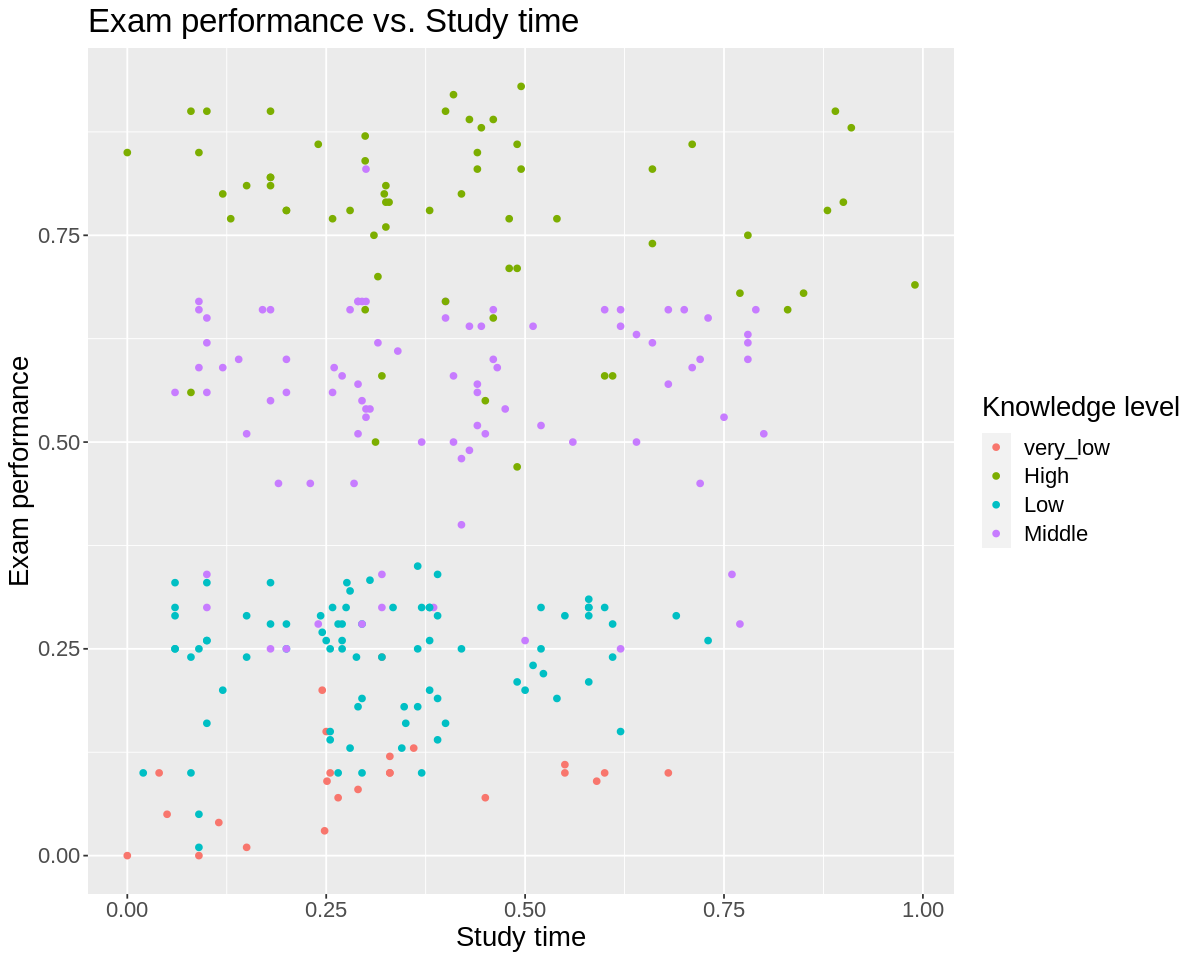

In [32]:

options(repr.plot.width = 10, repr.plot.height = 8)
exam_plot_study <- training_data %>%
            ggplot(aes(x = study_time_goal, y = exam_performance_goal)) +
            geom_point(aes(color = knowledge_level)) +
            labs(x = "Study time", y = "Exam performance", color = ("Knowledge level")) +
            ggtitle("Exam performance vs. Study time") +
            theme(text = element_text(size = 16.5))
exam_plot_study


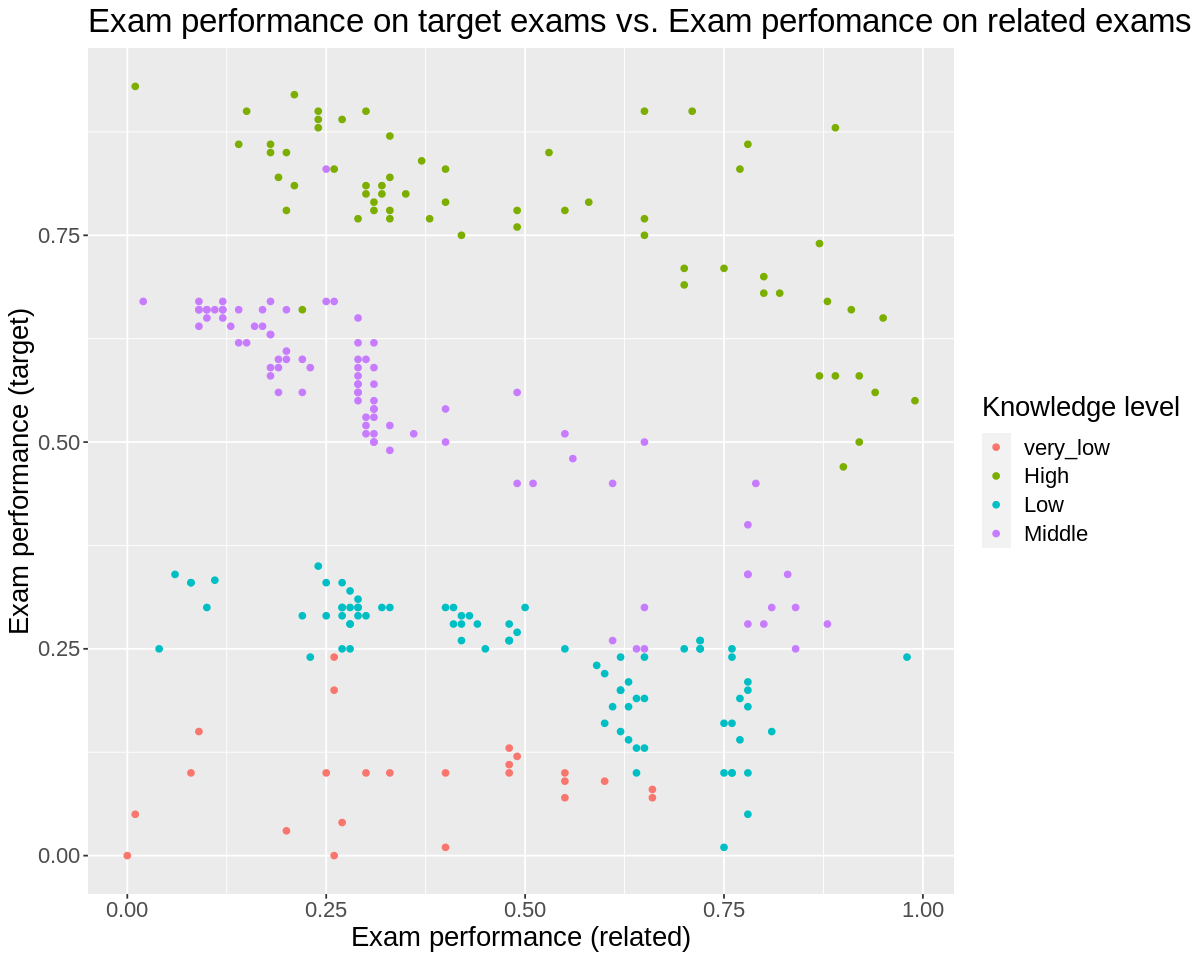

In [33]:

exam_plot_related <- training_data %>%
            ggplot(aes(x = exam_performance_related, y = exam_performance_goal)) +
            geom_point(aes(color = knowledge_level)) +
            labs(x = "Exam performance (related)", y = "Exam performance (target)", color = ("Knowledge level")) +
            ggtitle("Exam performance on target exams vs. Exam perfomance on related exams") +
            theme(text = element_text(size = 16.5))
exam_plot_related
